In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import zoom

In [15]:
skels = np.load("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton.npy")
subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton_subject.csv")
subjects_labels = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/subjects_labels.csv", index_col=0)

subjects_labels['label'] = np.where(subjects_labels.Right_PCS == 'present', 1, 0)

print(skels.shape, subjects.shape, subjects_labels.shape)
print(subjects.head())
subjects_labels

(341, 17, 40, 38, 1) (341, 1) (381, 65)
        Subject
0  1-03HUBJO_t0
1  1-08ANDTI_t0
2  1-11LEBJO_t0
3  1-15LEHMI_t0
4  1-17COLMA_t0


,PERSON_ID,Sujet,name,DATABASE,SEX,HAND,IRM_NAME0,IRM_NAME1,long_name,Left_PCS,...,TMTB,Flex,right_3level,left_2level,right_2level,Asym3_from2,Asym3_from3,Asym2_from2,PCS_asymetry,label
0,28223069.0,NaN,NaN,NIMH_COS,M,R,nih_chp_00022,nih_chp_04701,nih_chp_04701_t1,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,29733396.0,NaN,NaN,NIMH_COS,M,M,nih_chp_00007,nih_chp_01534,nih_chp_01534_t1,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,30374647.0,NaN,NaN,NIMH_COS,M,M,nih_chp_00014,nih_chp_04623,nih_chp_04623_t1,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,31323686.0,NaN,NaN,NIMH_COS,M,M,nih_chp_00409,nih_chp_01503,nih_chp_01503_t1,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,32488967.0,NaN,NaN,NIMH_COS,M,M,nih_chp_00094,nih_chp_00404,nih_chp_00404_t1,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,NaN,a0005,NaN,TISSIER_2018,M,NaN,NaN,NaN,a0005_t1_s03,absent,...,23.51,7.55,present,absent,present,Asym_right,Asym_right,Asym,1,1
377,NaN,a0006,NaN,TISSIER_2018,M,NaN,NaN,NaN,a0006_t1_s03,present,...,13.77,3.06,absent,present,absent,Asym_left,Asym_left,Asym,1,0
378,NaN,a0001,NaN,TISSIER_2018,M,NaN,NaN,NaN,a0001_t1_s03,present,...,21.14,8.28,proeminent,present,present,Sym,Sym,Sym,0,1
379,NaN,a0016,NaN,TISSIER_2018,F,NaN,NaN,NaN,a0016_t1_s03,absent,...,27.61,16.99,present,absent,present,Asym_right,Asym_right,Asym,1,1


In [18]:
test_pickle_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/16-13-24_111/ACCpatterns_supervised_results/attributions.pkl"

with open(test_pickle_path, 'rb') as file:
    grads = pickle.load(file)

grads

{'train': {'0': {'1-11LEBJO_t0': array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
   
           [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 2.9822531e-05, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]]],
         dtype=float32),
   '1-15LEHMI_t0': array([[[[0.        , 0.        , 0.        , 0.00186923],
            [0.        , 0.        , 0.00528895, 0.00289659],
            [0.        , 0.0042156 , 0.00170868, 0.      

In [19]:
print(grads.keys())

print(grads['train'].keys())  # 0 and 1 are the classes

print(len(grads['train']['0'].keys()))

print(grads['train']['0']['1-11LEBJO_t0'].shape)
print(grads['train']['1']['1-11LEBJO_t0'].shape)

print(grads['train']['0']['1-11LEBJO_t0'])
print('')
print(grads['train']['1']['1-11LEBJO_t0'])

dict_keys(['train', 'val', 'test'])
dict_keys(['0', '1'])
246
(1, 2, 5, 4)
(1, 2, 5, 4)
[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 2.9822531e-05 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]]]

[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

Chosen subject: nih_chp_03404_t1
Corresponding index: 158
(17, 40, 38)
1


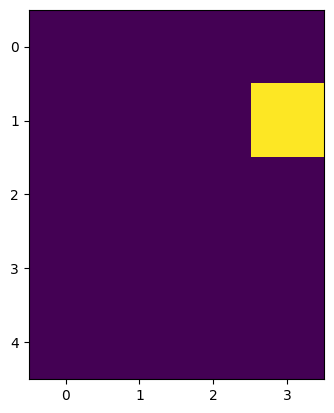

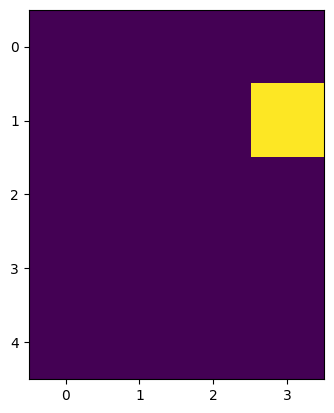

In [45]:
sub_name = np.random.choice(list(grads['train']['0'].keys()))
print("Chosen subject:", sub_name)

idx = subjects[subjects.Subject == sub_name].index[0]
print("Corresponding index:", idx)
skel_sub = skels[idx, ..., 0]
print(skel_sub.shape)

sub_label = str(subjects_labels[subjects_labels.long_name == sub_name].label.values[0])
print(sub_label)

grads_ind = grads['train'][sub_label][sub_name][0]

plt.imshow(grads_ind[0])
plt.figure()
plt.imshow(grads_ind[1])

(2, 5, 4) (341, 17, 40, 38, 1)


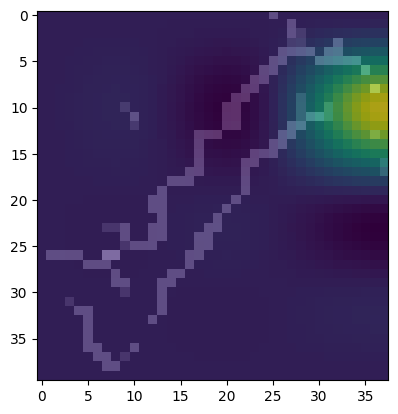

In [46]:
print(grads_ind.shape, skels.shape)
resize_ratio = np.divide(skels.shape[1:-1], grads_ind.shape)

upsampled_grads_ind = zoom(grads_ind, zoom=resize_ratio)
plt.imshow(skel_sub[10,:,], cmap='gray')
plt.imshow(upsampled_grads_ind[10], alpha=0.7)